In [51]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [52]:
cond = df['Species'].isin(['Bream', 'Smelt']) # Bream, Smelt만 뽑아온
fish_data = df.loc[cond, ['Length2', 'Weight']] # 길이, 무게 데이터를 만듦
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [53]:
fish_target = df.loc[cond,['Species']]
# fish_target

In [54]:
from sklearn.model_selection import train_test_split
# 기본적으로 25%를 train 데이터로 만들어줌

In [55]:
# \이용하면 한줄 내려 이어쓰기

train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target)

# 두개의 데이터 인덱스를 일치시키면서 자르고 섞는다
# 인풋이 먼저 나옵니다 (data를 먼저 넣었기 때문에)
# random_state 는 random seed와 비슷하게
# 실행할 때마다 똑같은 수를 보고싶다면 옵션값 주기

In [56]:
len(train_target)

36

In [57]:
len(test_target)

13

In [58]:
test_target # 잘 섞였는지를 확인할 수 있음

,Species
22,Bream
11,Bream
31,Bream
2,Bream
156,Smelt
150,Smelt
12,Bream
4,Bream
149,Smelt
14,Bream


In [59]:
# 학습시키기
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 인스턴스화

kn.fit(train_input, train_target)

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [60]:
kn.score(test_input, test_target['Species']) # 100점...?

1.0

In [61]:
kn.predict([[25, 150]])
# 25, 150 위치에 있는 데이터는 smelt인 것 같아

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

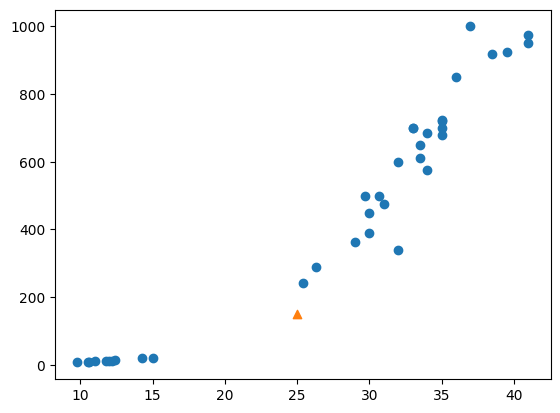

In [62]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^') # marker 옵션을 주면 다른 모양으로 보여줌

In [63]:
kn.kneighbors([[25, 150]])
# 가까이에 있는 친구와의 거리를 보여줌

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.39320793]]),
 array([[ 2, 29, 16, 32, 19]]))

In [64]:
# 기준을 바꾸는 과정
mean = train_input.mean()
std = train_input.std()

print(mean)
print(std)

Length2     27.491667
Weight     461.969444
dtype: float64
Length2     10.367404
Weight     337.950467
dtype: float64


In [65]:
train_scaled = (train_input - mean) / std
# 모든 데이터에서 모든 평균을 다 빼고 표준편차만큼 나눠줘 (표준점수화)
# 스케일이 일정하게 바뀐 데이터

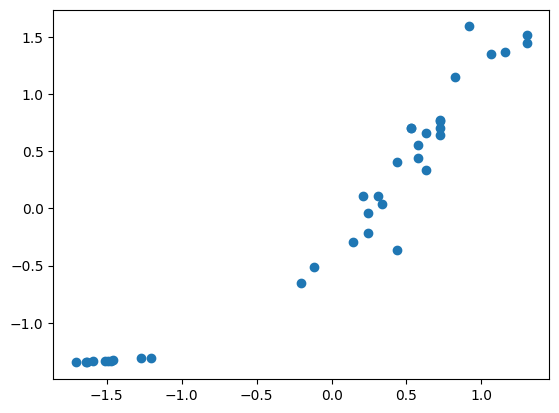

In [66]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [67]:
kn.fit(train_scaled, train_target['Species']) # fit = 학습시켜줘! 스케일드된 , 범위가 바뀐 친구를 넣어주기

KNeighborsClassifier()

In [68]:
# 평가하는 데이터도 점수를 표준점수화해야함
test_scaled = (test_input - mean) / std

In [69]:
kn.score(test_scaled, test_target) # 100점...? 왓 백점

1.0

In [70]:
# 이상치 친구 뽑기(수상한...)

In [71]:
new = ([25, 150] - mean) / std

In [72]:
new

Length2   -0.240337
Weight    -0.923122
dtype: float64

In [73]:
kn.predict([new]) # predict가 뭐십니까

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

In [104]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [105]:
df.info() # 누락값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [106]:
# df = df.dropna() / non 데이터를 모두 없앰.
df.dropna(inplace=True)

In [107]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [108]:
# Adelie와 Gentoo값 뽑기

cond = df['species'].isin(['Adelie', 'Gentoo'])
pg_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]

# 두가지의 수치가 극명하게 나뉜 수치를 가지고 비교하는 것이 좋음
# 인접해 있는 값들을 참고하므로

In [109]:
pg_target = df.loc[cond, ['species']]

# pg_target

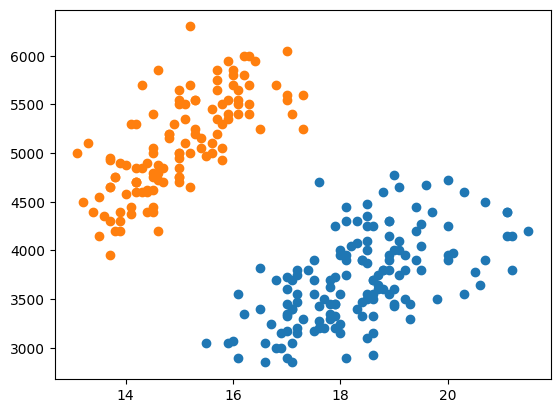

In [110]:
import matplotlib.pyplot as plt

plt.scatter(df.loc[df['species'] == 'Adelie', 'bill_depth_mm'], df.loc[df['species'] == 'Adelie', 'body_mass_g'])
plt.scatter(df.loc[df['species'] == 'Gentoo', 'bill_depth_mm'], df.loc[df['species'] == 'Gentoo', 'body_mass_g'])

In [120]:
from sklearn.model_selection import train_test_split

# 트레이닝, 테스트 셋 만들기
# train_test_split(몸무게 등 정보, 펭귄종)
train_input, test_input, train_target, test_target = train_test_split(pg_data, pg_target)

In [121]:
mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std
# bill depth와 무게의 단위 차가 많이 나기 때문에
# 그래프를 잘 그리기 위해 scaled를 하여 표준점수 산정

In [122]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
# 어떤 데이터가 어떤 그룹(클래스)에 속하는지 예측하는 프로그램
# 주어진 데이터를 학습하여
# 새로운 데이터가 들어오면 주변에 있는 k개의 데이터를 찾아서
# 주변에 가장 많은 그룹으로 분류함

In [124]:
# print(train_scaled.shape)
# print(train_target.shape)
kn.fit(train_scaled, train_target)
# 학습시킴

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [125]:
test_scaled = (test_input - mean) / std

In [126]:
kn.score(test_scaled, test_target)

1.0